<a href="https://colab.research.google.com/github/Utkarshsahu16/YBI-Internship/blob/main/Machine_Learning_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hand Written Digit Prediction - Classification Analysis**

The digits consist of 8x8 pixel images of digits. The images attribute of th dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attributes of the dataset stores the digit each image represents

# **Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

# **Import Data**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

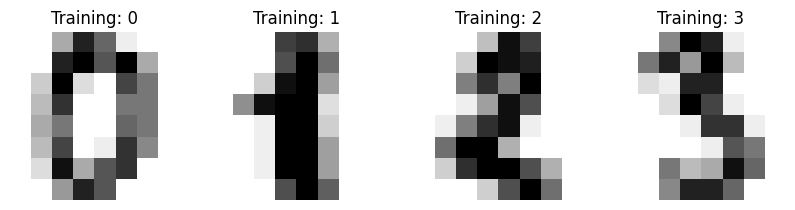

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# **Data Preprocessing**

Flatten Image                      




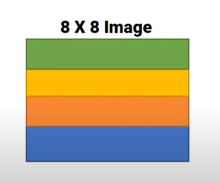

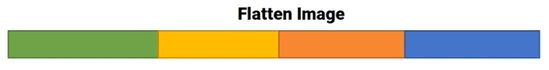

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data= data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# **Predict Test Data**

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([6, 8, 1, 0, 9, 6, 4, 8, 7, 1, 5, 0, 1, 1, 2, 9, 8, 1, 8, 0, 4, 9,
       8, 3, 0, 8, 0, 4, 0, 3, 6, 6, 7, 3, 1, 5, 6, 0, 4, 8, 8, 6, 3, 4,
       6, 6, 1, 0, 6, 6, 9, 9, 4, 0, 5, 3, 3, 5, 7, 7, 8, 8, 0, 1, 3, 7,
       0, 4, 8, 4, 2, 2, 3, 7, 4, 4, 5, 9, 6, 9, 1, 8, 0, 3, 5, 3, 9, 8,
       9, 9, 0, 2, 3, 5, 4, 4, 0, 6, 8, 8, 3, 8, 2, 0, 1, 2, 4, 8, 6, 8,
       0, 3, 4, 8, 2, 3, 0, 2, 7, 8, 9, 6, 3, 5, 4, 9, 2, 7, 1, 0, 6, 0,
       5, 0, 8, 3, 0, 3, 9, 4, 0, 4, 5, 2, 7, 0, 9, 4, 8, 8, 1, 1, 6, 4,
       7, 8, 6, 2, 6, 8, 2, 3, 7, 7, 3, 5, 5, 8, 6, 6, 1, 9, 2, 2, 7, 7,
       4, 3, 4, 2, 4, 2, 7, 9, 2, 2, 4, 0, 3, 2, 1, 0, 9, 9, 3, 4, 2, 9,
       6, 1, 7, 8, 5, 4, 8, 4, 8, 7, 6, 6, 2, 9, 8, 2, 3, 3, 8, 6, 3, 9,
       0, 0, 1, 4, 6, 5, 8, 6, 5, 6, 2, 3, 9, 9, 5, 2, 2, 4, 1, 4, 9, 2,
       3, 2, 9, 6, 1, 5, 2, 7, 4, 5, 9, 0, 7, 5, 9, 2, 1, 9, 4, 1, 8, 5,
       1, 1, 2, 9, 3, 4, 9, 0, 2, 2, 8, 0, 3, 8, 7, 0, 5, 5, 9, 5, 4, 5,
       4, 4, 8, 2, 7, 8, 9, 9, 5, 6, 1, 7, 1, 9, 0,

# **Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[62,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  1, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  1, 53,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 56]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       0.98      0.98      0.98        49
           2       0.98      1.00      0.99        48
           3       0.98      0.98      0.98        48
           4       1.00      1.00      1.00        54
           5       0.95      0.96      0.96        56
           6       1.00      0.98      0.99        59
           7       0.98      0.98      0.98        50
           8       0.98      0.93      0.95        57
           9       0.95      0.98      0.97        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# **Explaintion**



*   **Import Libraries:**

                   *   pandas, numpy, and matplotlib.pyplot for data manipulation and visualization.
                   *   sklearn.datasets.load_digits to load the digit dataset.
                   *   sklearn.model_selection.train_test_split to split the data into training and testing sets.
                   *   sklearn.ensemble.RandomForestClassifier to create and train the Random Forest classifier.
                   *   sklearn.metrics.confusion_matrix, classification_report to evaluate the model.

*   **Load the Data:**


                   *   load_digits() loads the dataset into a variable df.


*   **Visualize the First 4 Images:**


                   *   plt.subplots creates a plot with 1 row and 4 columns.
                   *   Loop through the first 4 images and their labels to display them using imshow.


*   **Data Preprocessing:**


                   *   Flatten the 8x8 images into 1D arrays of 64 elements.
                   *   Normalize the pixel values from the range [0, 16] to [0, 1].


*   **Train-Test Split:**


                   *   Split the data into training (70%) and testing (30%) sets using train_test_split.



*   **Train the Model:**


                   *   Initialize RandomForestClassifier and train it using fit with the training data.


*   **Predict Test Data:**


                   *   Use the trained model to predict the labels for the test data.


*   **Evaluate the Model:**


                   *   Use confusion_matrix and classification_report to evaluate the model’s performance and print the results.
















